# K-Means

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
import skimage.io
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA

In [3]:
mat = scipy.io.loadmat('imagelabels.mat')
lb = mat['labels']

In [4]:
def load_data(data_directory, num_images=None):
    labels = lb[0]
    images = []

    file_names = [f for f in os.listdir(data_directory) if f.endswith(".jpg")]

    if num_images:
        file_names = file_names[:num_images]

    for file_name in file_names:
        file_path = os.path.join(data_directory, file_name)
        img = skimage.io.imread(file_path)
        img_resized=resize(img,(28,28,3))
        images.append(img_resized.flatten())

    return images, labels

In [5]:
dataset , label = load_data('test')
label = label[:len(dataset)]

In [6]:
for i in range(len(label)):
    if label[i] == 77:
        label[i] = 0
    elif label[i] == 73:
        label[i] = 1
    else:
        label[i] = 2

In [7]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.3, random_state= 41)

In [9]:
# kMean is unsupervised learning (clustering)
k=3 

kMeans_model=KMeans(n_clusters=k,init="k-means++",n_init=10, random_state=45)

kMeans_model.fit(x_train)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=45)

In [10]:
kmean_centroid=kMeans_model.cluster_centers_
kmean_centroid # there is clusters

array([[0.29493594, 0.34350662, 0.20995373, ..., 0.25797816, 0.31439677,
        0.19288608],
       [0.13845716, 0.1764479 , 0.08891536, ..., 0.14907783, 0.18939855,
        0.09346497],
       [0.53856952, 0.54512587, 0.48607628, ..., 0.41793666, 0.42144913,
        0.34718223]])

In [11]:
flat_images = np.array(kmean_centroid)

In [12]:
df = pd.DataFrame(flat_images) #dataframe

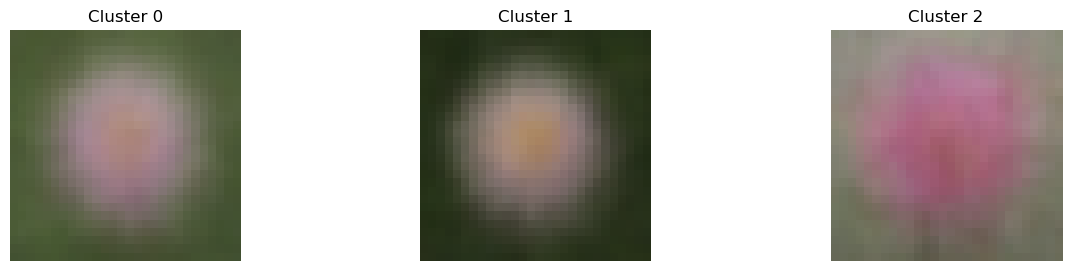

In [13]:
n_clusters = 3

fig, ax = plt.subplots(1, n_clusters, figsize=(15, 3))

for i in range(n_clusters):
    center_image = kMeans_model.cluster_centers_[i].reshape(28, 28, 3)  # Reshape to original dimensions
    ax[i].imshow(center_image)
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {i}')

plt.show()


In [14]:
y_kmean_pred=kMeans_model.predict(x_test)
y_kmean_pred[:5]

array([2, 2, 1, 0, 0])

In [15]:
accuracy = accuracy_score(y_kmean_pred, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5277777777777778


In [16]:
y_kmean_pred

array([2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2,
       1, 1, 1, 2])

In [17]:
y_test

array([2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0,
       0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0,
       1, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1,
       2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1,
       1, 0, 1, 2], dtype=uint8)

# Segmentation 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
import skimage.io
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
import cv2
#load image
image = cv2.imread('test//image_00001.jpg')
#convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

E:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
image.shape

(500, 591, 3)

In [5]:
pixel_values = image.reshape((-1,3))
#convert to float
pixel_values = np.float32(pixel_values)

In [6]:
pixel_values.shape

(295500, 3)

In [7]:
criteria = (cv2.TERM_CRITERIA_EPS  + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.95)

In [8]:
# number of clusters
k = 3
attempts = 10
ret, labels, (center) = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

In [9]:
# convert back into uint8
center = np.uint8(center)
# flatten the labels array
labels = labels.flatten()


In [10]:
# convert all pixels to the color of centroids
res = center[labels.flatten()]
# reshape back to the orginal image dimantion
result_image = res.reshape(image.shape)

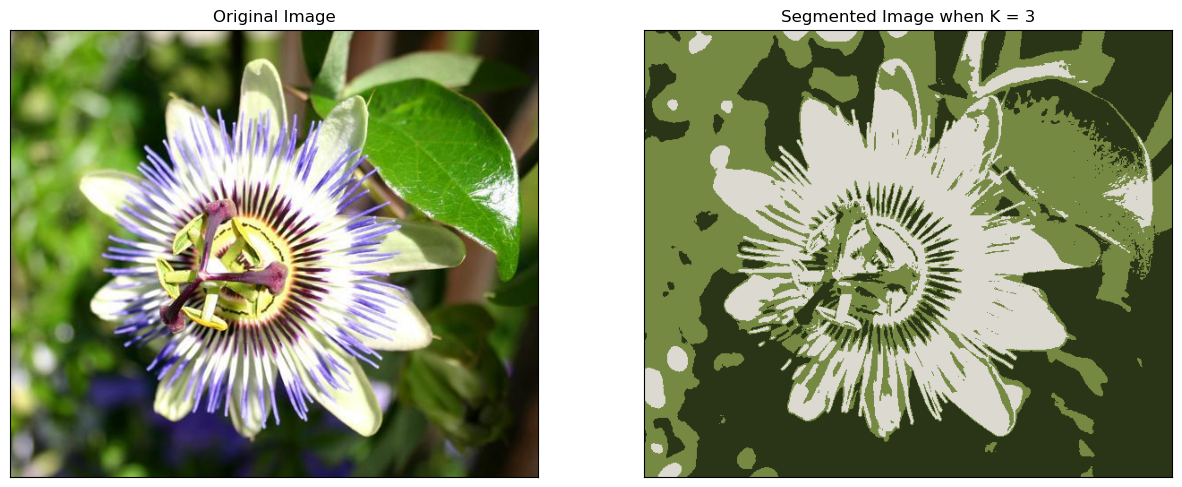

In [11]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()